In [1]:
'''
This program is made to explore how a single hydrogen atom
(an electron bound to a proton) behaves inside a laser beam.

To simulate a laser beam, two 'infinitely long', oppositely charged barriers
will be placed in parallel, between which the hydrogen atom will sit.
This simulates the classical view of a laser beam - an oscillating electric
field.
'''

import numpy as np
from scipy.constants import pi

def potential(N,t):
    '''Sets the potential between the barriers and the charge on the barriers'''
    
    # the initial potential between the two barriers
    V  = np.zeros([N,N])
    
    # Charge on the barriers as a function of time
    V[:,0] = -A*np.sin(pi*t)
    V[:,-1] = A*np.sin(pi*t)
    
    # Create a copy to be used in the Jacobi update
    Vp = np.copy(V)

    return V,Vp


def jacobi_update(V,Vp):
    '''Updates the potential according to the Jacobi method.'''
    
    ΔV = 0.0
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Vp[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
            ΔV += abs(Vp[i,j]-V[i,j])

    return ΔV


def getE(V):
    '''Computes the electric field from the potential'''

    # Initialize the E-Field arrays    
    Ex = np.zeros(V.shape)
    Ey = np.zeros_like(Ex)

    # Compute the electric field as the gradient of the potential
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Ex[i,j] = -0.5*(V[i,j+1]-V[i,j-1])
            Ey[i,j] = -0.5*(V[i+1,j]-V[i-1,j])

    # Return the electric field
    return Ex,Ey

def hydrogen(Ex,Ey):
    '''Creates an array as a vizualization of an electron
    bound to a proton traversing different energy levels'''
    
    # initial H
    H = np.zeros([w,w],dtype=int)        
    H[w//2,w//2] = 2               # proton

    # Initial energy level of electron (negative numbers indicate
    # the electron is on the left side of proton, positive for right)
    n = -1

    # Electron position
    H[w//2,w//2+n] = 1

    # This loop updates the energy level of the electron according to
    # electric field strength
    for i in range(len(qn)):
        
        # positive E field
        if Ex[3,3] > (En[i] - En[0]) and Ex[3,3] < (En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = qn[i]
            H[w//2,w//2+n] = 1
        
        # negative E field
        elif Ex[3,3] < -(En[i] - En[0]) and Ex[3,3] > -(En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = -qn[i]
            H[w//2,w//2+n] = 1
            
        # maximum displacement
        elif Ex[3,3] > En[-1] - En[0]:
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = w//2
            H[w//2,-1] = 1
        
        # maximum displacement
        elif Ex[3,3] < -(En[-1] - En[0]):
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 

            n = -w//2+1
            H[w//2,0] = 1
            
    return(H,n,ion)

In [2]:
t = 1                     # initial time
N = 5                     # length/width of array where the potential will be calculated
A = 10                    # max amplitude of the charge on the barriers
V,Vp = potential(N,t)     # initialize the potential

# initialize the hydrogen atom
# set ionization = false, energy levels, width of the array, quantum numbers
ion = False
En = [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
w = len(En)*2 - 1
qn = np.arange(1,w//2+1)

# the tolerance for convergence
ϵ = 1.0E-5
     
sinEx = []
sinEy = []
nlist=[]
tlist=[]
time_iters = np.linspace(0,4,1000)
for i in time_iters:
    
    V,Vp = potential(N,i)

    # Iterate until convergence
    count = 0
    ΔV = 1.0
    while ΔV/(N*N) > ϵ:
        ΔV = jacobi_update(V,Vp)
        ΔV += jacobi_update(Vp,V)
        count += 1

    Ex,Ey = getE(V)
    
    sinEx.append(Ex[2,1])
    sinEy.append(Ey[2,1])

    if ion == False:
        hy,n,ion = hydrogen(Ex,Ey)
        nlist.append(n)
        tlist.append(i)
        print(hy[w//2],f'\tEx = {Ex[2,1]:.2f}', f'\tt = {i:.4f} msec',f'\tPosition: {n}')
    
# format sinE to 3 decimals    
for i in range(len(sinEx)):
    sinEx[i]=float('%.1f'%sinEx[i])

[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.00 	t = 0.0000 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.06 	t = 0.0040 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.13 	t = 0.0080 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.19 	t = 0.0120 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.25 	t = 0.0160 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.31 	t = 0.0200 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.38 	t = 0.0240 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.44 	t = 0.0280 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.50 	t = 0.0320 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.56 	t = 0.0360 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.63 	t = 0.0400 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.34 	t = 0.8448 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.29 	t = 0.8488 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.23 	t = 0.8529 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.17 	t = 0.8569 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.12 	t = 0.8609 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.06 	t = 0.8649 msec 	Position: -3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -2.00 	t = 0.8689 msec 	Position: -3
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.94 	t = 0.8729 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.89 	t = 0.8769 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.83 	t = 0.8809 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.77 	t = 0.8849 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.52 	t = 1.9019 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.46 	t = 1.9059 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.40 	t = 1.9099 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.34 	t = 1.9139 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.28 	t = 1.9179 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.21 	t = 1.9219 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.15 	t = 1.9259 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.09 	t = 1.9299 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.03 	t = 1.9339 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.97 	t = 1.9379 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.91 	t = 1.9419 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.85 	t = 1.945

[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.38 	t = 2.9109 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.32 	t = 2.9149 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.26 	t = 2.9189 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.20 	t = 2.9229 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.14 	t = 2.9269 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.08 	t = 2.9309 msec 	Position: -2
[0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -1.01 	t = 2.9349 msec 	Position: -2
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.95 	t = 2.9389 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.89 	t = 2.9429 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.83 	t = 2.9469 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0] 	Ex = -0.77 	t = 2.9510 msec 	Position: -1
[0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.18 	t = 3.9239 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.12 	t = 3.9279 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0] 	Ex = 1.06 	t = 3.9319 msec 	Position: 2
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 1.00 	t = 3.9359 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.94 	t = 3.9399 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.88 	t = 3.9439 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.81 	t = 3.9479 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.75 	t = 3.9520 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.69 	t = 3.9560 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.63 	t = 3.9600 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.56 	t = 3.9640 msec 	Position: 1
[0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0] 	Ex = 0.50 	t = 3.968

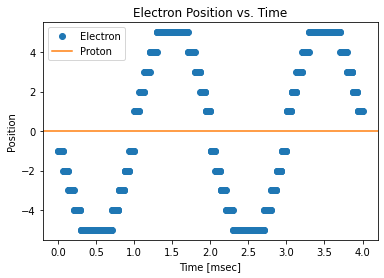

In [3]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.plot(tlist,nlist,'o',label='Electron')
plt.title('Electron Position vs. Time')
plt.xlabel('Time [msec]')
plt.ylabel('Position')
plt.axhline(y=0,label='Proton',c=colors[1])
plt.legend()
plt.show()

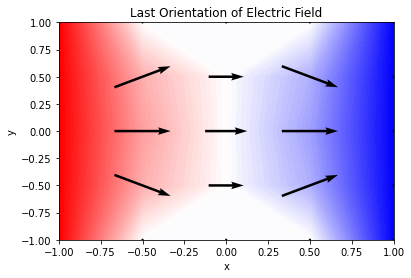

Ex = 2.4492935982947065e-15


In [4]:
X,Y = np.meshgrid(np.linspace(-1.0,1.0,N),np.linspace(-1.0,1.0,N))

plt.contourf(X,Y,V,100, cmap='bwr')
plt.quiver(X,Y,Ex,Ey,pivot='mid')
plt.axis([-1.0,1.0,-1.0,1.0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Last Orientation of Electric Field')
plt.show()

print(f'Ex = {Ex[3,3]}')

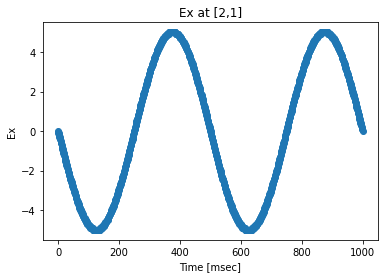

In [5]:
plt.plot(sinEx,'o')
plt.title('Ex at [2,1]')
plt.xlabel('Time [msec]')
plt.ylabel('Ex')
plt.show()

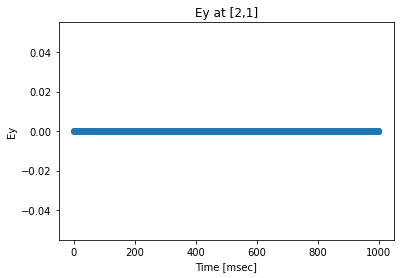

In [6]:
plt.plot(sinEy,'o')
plt.title('Ey at [2,1]')
plt.xlabel('Time [msec]')
plt.ylabel('Ey')
plt.show()

In [7]:
# Excitation energies

def hydrogen(Ex,Ey):
    
    # initial H, ground state
    H = np.zeros([w,w],dtype=int)        
    H[w//2,w//2] = 2               # proton
    
    n = 1                          # quantum number
    H[w//2,w//2-n] = 1             # electron
    
    ion = False
    
    for i in range(len(qn)-1):
        
        # positive E field
        if Ex > (En[i] - En[0]) and Ex < (En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = qn[i]
            H[w//2,w//2-n] = 1
            
        
        # negative E field
        elif Ex < -(En[i] - En[0]) and Ex > -(En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = qn[i]
            H[w//2,w//2+n] = 1
        
        # electron is free
        elif Ex > En[-1] - En[0] or Ex < -(En[-1] - En[0]):
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            n = 'Ion'
            ion = True
            
    return(H,n,ion)


# hydrogen
En = [-13.6, -3.4, -1.511, -0.850, -0.544, -0.378, -0.278, -0.213, -0.168, -0.136, -0.112, -0.094]
qn = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
ion = False
nlist=[]
w = 21


# iterate through range of frequencies

nlist=[]
nlist2=[]
flist=[]
Elist=[]
h = 4.135667696e-15
ion=False
freqs = np.linspace(3e15,3.3e15,500)
for i in freqs:
    Ex = h*i
    Ey = 0
    
    if ion==False:
        hy,n,ion = hydrogen(Ex,Ey)
        nlist.append(n)
        flist.append(i)
        Elist.append(Ex)
        if n not in nlist2:
            nlist2.append(n)
            
        print(hy[w//2],f'\tν = {i:.5E}',f'\tE = {Ex:.5f} eV,',f'\tn = {n}')


[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00000E+15 	E = 12.40700 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00060E+15 	E = 12.40949 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00120E+15 	E = 12.41198 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00180E+15 	E = 12.41446 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00240E+15 	E = 12.41695 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00301E+15 	E = 12.41943 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00361E+15 	E = 12.42192 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00421E+15 	E = 12.42441 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00481E+15 	E = 12.42689 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00541E+15 	E = 12.42938 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.00601E+15 	E = 12.43187 eV, 	n = 3
[0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.006

[0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19539E+15 	E = 13.21507 eV, 	n = 5
[0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19599E+15 	E = 13.21756 eV, 	n = 5
[0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19659E+15 	E = 13.22005 eV, 	n = 5
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19719E+15 	E = 13.22253 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19780E+15 	E = 13.22502 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19840E+15 	E = 13.22751 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19900E+15 	E = 13.22999 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.19960E+15 	E = 13.23248 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.20020E+15 	E = 13.23497 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.20080E+15 	E = 13.23745 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.20140E+15 	E = 13.23994 eV, 	n = 6
[0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0] 	ν = 3.202

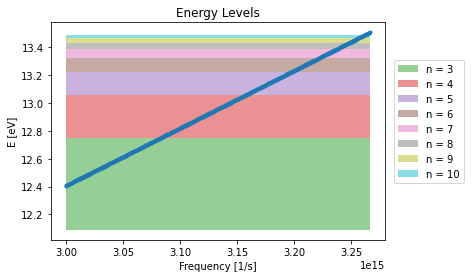

In [8]:
plt.plot(flist,Elist,'.')
plt.title('Energy Levels')
plt.xlabel('Frequency [1/s]')
plt.ylabel('E [eV]')
for i in nlist2[:-2]:
    plt.fill_between(flist,y1=(En[i-1]-En[0]), y2=(En[i]-En[0]), facecolor=colors[i-1], alpha=0.5,label=f'n = {qn[i-1]}')
plt.legend(bbox_to_anchor=(1.25, 0.85))
plt.show()

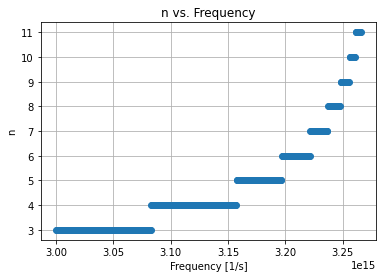

In [9]:
plt.plot(flist[:-1],nlist[:-1],'o')
plt.title('n vs. Frequency')
plt.xlabel('Frequency [1/s]')
plt.ylabel('n')
plt.grid()
plt.show()

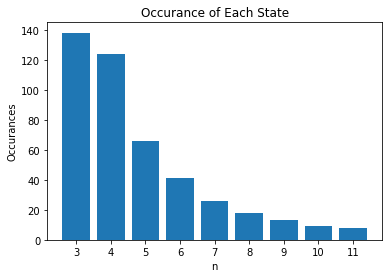

In [10]:
uniq = np.unique(nlist[:-1])

countlist = []
for i in np.unique(nlist[:-1]):
    count = 0
    for j in nlist:
        if j == i:
            count += 1
    countlist.append(count)

plt.bar(uniq, countlist, tick_label=uniq)
plt.ylabel('Occurances')
plt.xlabel('n')
plt.title('Occurance of Each State')
plt.show()